# 3a. Random Forest Regressor

We can now load either our PCA data or our UMAP data and use supervised learning algorithms to predict our outcome variable using the scaled and reduced data. I have created two separate files for this step, differing on which algorithm they use (Random Forest Regressor vs. Support Vector Regressor). These are designed to work completely separate from one another, and only running one of the two is necessary, but it is helpful to run both and compare them.

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict, GridSearchCV

In [87]:
class RFregressor:
    
    '''
        INIT FUNCTION:
        
        -- This __init__ function is slightly different from the ones used in KNN Imputation, PCA, and UMAP.
        
        -- In addition to specifying "IDs", specify an outcome variable to predict. "IDs" should still include this variable.
        
        -- self.X is an array containing all the data except the IDs; self.y is an array of the values of the outcome variable.
    '''
    
    def __init__(self, datafile, outcome, nonfeatures = []):
        self.df = pd.read_csv(datafile)
        self.X = np.array(self.df.drop(nonfeatures, 1))
        self.y = np.array(self.df[outcome])
        self.Xdf = pd.DataFrame(self.X)
        self.ydf = pd.DataFrame(self.y)
        self.scoring_options = sorted(metrics.SCORERS.keys())
        
    '''
        GRID_SEARCH METHOD:
        
        --Specify scoring method and number of folds.
        
        --Also specify lists or ranges of values for paramters max_depth and n_estimators
        
        --The grid search
    '''
    
    def grid_search(self, scoring, max_depth=[], n_estimators=[], cv=[]):
        self.gsc = GridSearchCV(
                estimator=RandomForestRegressor(random_state=42),
                param_grid={
                    'max_depth': max_depth,
                    'n_estimators': n_estimators,
                },
                cv=cv, scoring=scoring, verbose=0,n_jobs=-1,)
        self.grid_result = self.gsc.fit(self.X, self.y)
        self.best_params = self.grid_result.best_params_
        print(self.best_params)
        
    '''
        REGRESS METHOD:
        
        --Specify a scoring method and a number of folds for cross-validation.
        
        --The model uses the best parameters from the grid_search method.
        
        --self.predictions outputs predicted values; self-scores outputs specified metrics of model performance.
    '''    
    
    def regress(self, scoring, cv=[]):
        self.rf_model = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"], random_state=42, verbose=False)
        self.predictions = cross_val_predict(self.rf_model, self.X, self.y, cv=cv)
        self.scores = cross_val_score(self.rf_model, self.X, self.y, cv=cv, scoring=scoring)
        print(self.scores)
        
    '''
        IMPORTANCE METHOD:
        
        --Outputs and visualizes feature importances 
    '''
    
    def importance(self):
        self.rf_model.fit(self.X, self.y)
        self.importance = self.rf_model.feature_importances_
        plt.bar([x for x in range(len(self.importance))], self.importance)
        plt.title('Feature Importances')
        plt.show()

In [97]:
def avg(lst): 
    return sum(lst) / len(lst)

In [93]:
#Inputting PCA data for this example
#Outcome variable is presence, IDs are presence and labvisitid
RFR1 = RFregressor("SCALED_PCA_DATA.csv", 'presence', nonfeatures = ['labvisitid', 'presence'])

#Grid search with ranges/lists of potential values
#I did some trial and error to get good lists/ranges
RFR1.grid_search('neg_mean_squared_error', max_depth=range(2,4), n_estimators=(70,80,90,100), cv=5)

#Outputting an array of (negative) root mean squared error and R^2 for each fold
#For some reason, sklearn outputs negative values for mean squared error and some related metrics,...
#...so they changed the name to 'neg_root_mean_squared_error'
RFR1.regress('neg_root_mean_squared_error', cv = 5)
RFR_RMSE = RFR1.scores
RFR1.regress('r2', cv = 5)
RFR_R2 = RFR1.scores

{'max_depth': 2, 'n_estimators': 80}
[-0.72983575 -0.8198394  -0.70196415 -0.77375166 -0.70414213]
[-0.22888388 -0.3050032  -0.03308863  0.04266913 -0.03772076]


In [99]:
print("RFR RMSE:", RFR_RMSE)
print("RFR R^2:", RFR_R2)
RMSEavg = avg(RFR_RMSE)
R2avg = avg(RFR_R2)
print("Average RFR RMSE:", RMSEavg)
print("Average RFR R^2:", R2avg)

RFR RMSE: [-0.72983575 -0.8198394  -0.70196415 -0.77375166 -0.70414213]
RFR R^2: [-0.22888388 -0.3050032  -0.03308863  0.04266913 -0.03772076]
Average RFR RMSE: -0.745906617200745
Average RFR R^2: -0.11240546859344087


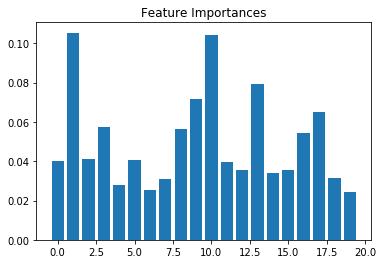

In [90]:
#Visualizing feature importance
RFR1.importance()

In [89]:
#A list of options for the scoring function
RFR1.scoring_options

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']